# Face Recognition

In a previous lab we used SVM and PCA to build a face recognition model for some famous faces. Let's do it using an artificial neural network and see how it performs.

One caveat, since these are images, we should be using a convolutional neural network but I won't talk about those until after Easter. I think the ANN might do ok

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60, resize=1)

I'm deliberately picking faces.images over faces.data here due to the shape

In [3]:
X = faces.images
y = faces.target

In [4]:
X[0]

array([[0.5254902 , 0.5176471 , 0.5058824 , ..., 0.25882354, 0.25882354,
        0.25490198],
       [0.5385621 , 0.5424837 , 0.54901963, ..., 0.2653595 , 0.26143792,
        0.25882354],
       [0.5542484 , 0.5660131 , 0.5660131 , ..., 0.2627451 , 0.26143792,
        0.2640523 ],
       ...,
       [0.25620916, 0.52679735, 0.71895427, ..., 0.00653595, 0.00653595,
        0.        ],
       [0.19738562, 0.44183007, 0.6640523 , ..., 0.00653595, 0.00261438,
        0.        ],
       [0.1267974 , 0.34640524, 0.56993467, ..., 0.00653595, 0.00261438,
        0.        ]], dtype=float32)

All values are between 0 and 1 so greyscale. No need to do any /255 like we did in the digits dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138)

In [6]:
import tensorflow as tf

Things to remember
- If the training loss is too high (or training accuracy is too low) this means your model is underfit and you may need a more complicated model
- If the validation loss is too high, while training loss is too low, your model is overfit. Maybe do less epochs, use early stopping, apply some form of regularisation
- Stanford course does say "don't use number of layers or units as a regularisation", i.e. don't just make the model simpler because of overfitting, apply regularisation instead

In [7]:
numberofclasses = np.unique(y).size

In [8]:
model = tf.keras.models.Sequential()

To start with I'm going with 3 hidden layers, each with 100 units. I also need to flatten the input as well.

The output layer needs as many units as the number of classes. 

In [9]:
model.add(tf.keras.layers.Flatten())

In [10]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [11]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [12]:
model.add(tf.keras.layers.Dense(100,activation='relu'))

In [13]:
model.add(tf.keras.layers.Dense(numberofclasses))

In [14]:
#model.summary() will not work as we have not defined the shape in flatten. But it will work after fit

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [16]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


26/26 [==============================] - 2s 23ms/step - loss: 2.1153 - accuracy: 0.2970 - val_loss: 1.9859 - val_accuracy: 0.1970
Epoch 2/100
26/26 [==============================] - 0s 16ms/step - loss: 1.8344 - accuracy: 0.3936 - val_loss: 1.8355 - val_accuracy: 0.4335
Epoch 3/100
26/26 [==============================] - 0s 15ms/step - loss: 1.7727 - accuracy: 0.4158 - val_loss: 1.9361 - val_accuracy: 0.2020
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 1.6395 - accuracy: 0.4233 - val_loss: 1.7020 - val_accuracy: 0.4433
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: 1.5617 - accuracy: 0.4851 - val_loss: 1.5965 - val_accuracy: 0.4335
Epoch 6/100
26/26 [==============================] - 0s 16ms/step - loss: 1.4540 - accuracy: 0.4988 - val_loss: 1.3821 - val_accuracy: 0.5123
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 1.3050 - accuracy: 0.5594 - val_loss: 1.3780 - val_accuracy: 0.5369
Epoc

Look at that training accuracy. 99%!

Validation is only in the 80s so overfitting :(

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11750)             0         
                                                                 
 dense (Dense)               (None, 100)               1175100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 8)                 808       
                                                                 
Total params: 1196108 (4.56 MB)
Trainable params: 1196108 (4.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.8249


[0.8799757957458496, 0.8249258399009705]

I got 82% accuracy which was around the same as SVM. But let's plot anyway

In [19]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

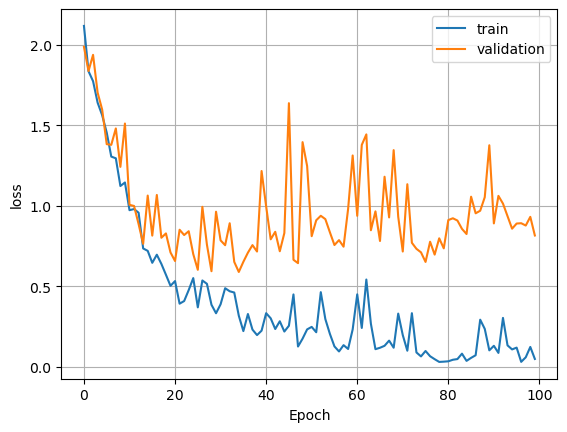

In [20]:
plot_loss(history)

In [21]:
X_train[0].shape

(125, 94)

Now it's your job to try out different networks.

Do different number of layers and units, what were the rules of thumb of I talked about in class? Try those

How about implementing some form of regularisation on the layers? Would this help?

How about using early stopping so it doesn't go for so many epochs?

Try different things and see if you can come up with a better network for this data

What about CNN? I think that would improve this by a bit!